<a href="https://colab.research.google.com/github/Byung-seok/code_snippet_/blob/main/grade_group_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset_path = 'C:/Users/HDS/Documents/Python/Work/2021_data/data/220408_워터박스 데이터셋_17년-22년3월.csv'
raw_dataset = pd.read_csv(dataset_path, na_values = "", comment='\t', sep=",", skipinitialspace=True, encoding = 'cp949')

raw_dataset_nan_drop = raw_dataset.dropna()
raw_dataset_nan_drop.reset_index(inplace = True, drop = True)

set_zero = set()
zero_allowance_include_date = ['', '', 'N', '', '', '', 'N', 'N', 'Y', 'N', 'N', '', '', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']

for ind, key in enumerate(raw_dataset_nan_drop.keys()):
    if zero_allowance_include_date[ind] == 'N':
        set_zero.update(raw_dataset_nan_drop[raw_dataset_nan_drop[key] == 0].index.tolist())

raw_dataset_nan_zero_drop = raw_dataset_nan_drop.drop(set_zero)
raw_dataset_nan_zero_drop.reset_index(inplace = True, drop = True)

grade_group = []

for i in range(len(raw_dataset_nan_zero_drop)):
    if raw_dataset_nan_zero_drop['규격약호'][i] in ["SCM435W", "SCM435W-J", "SCM435HW", "SCM435W-EX", "SCM435HW-J", "SCM435HW-M1", "SCM415HW", "SCM440W", "SCM440HW"]:
        grade_group.append(1)
    elif raw_dataset_nan_zero_drop['규격약호'][i] in ['SAE9254W-SI', 'SAE9254W-M2', 'SAE9254W-M1']:
        grade_group.append(2)
    elif raw_dataset_nan_zero_drop['규격약호'][i] in ['SWRCH10A', 'SWRCH45K', 'SWRCH18A-M1', 'SWRCH10A-M1', 'SWRCH18A', 'SWRCH25K', 'SWRCH35K', 'SWRCH45CR', 'SWRCH45KS', 'SWRCH35KS']:
        grade_group.append(3)
    elif raw_dataset_nan_zero_drop['규격약호'][i] in ['S1021B']:
        grade_group.append(4)
    elif raw_dataset_nan_zero_drop['규격약호'][i] in ['SAE1010', 'SAE1010-M1', 'SAE1018']:
        grade_group.append(5)
    elif raw_dataset_nan_zero_drop['규격약호'][i] in ['ER70S-T', 'ER70S-G']:
        grade_group.append(6)
    else:
        grade_group.append(0)
        
df = raw_dataset_nan_zero_drop.copy()
df['규격약호'] = grade_group

test_start_idx = df[(df['압연계상연도'] == 2022) & ((df['압연계상월'] == 3) | (df['압연계상월'] == 4))].index[0]

df.drop(['RM입측소재온도','IM2출측소재온도','PFM#2출측소재온도','NTM출측온도','RSM입측온도','권취온도','NTM SPEED','RSM SPEED','Stand23사용량','Stand24사용량',
              'Stand25사용량','Stand26사용량','Stand27사용량','Stand28사용량','Stand29사용량','Stand30사용량','Stand31사용량','Stand32사용량','Stand33사용량',
              'Stand34사용량','PFM후단면적','NTM후단면적','RSM후단면적','RM R/T 커버','IM R/T 커버','압연계상연도','압연계상월','압연계상일','규격약호',
              #'Zone1WZ1압력','1-1 2차밸브','Zone1WZ2유량','Zone1WZ2압력','1-2 2차밸브',
              'Zone2WZ1유량','Zone2WZ1압력','2-1 2차밸브','Zone2WZ2유량','Zone2WZ2압력','2-2 2차밸브',
              'Zone2WZ3유량','Zone2WZ3압력','2-3 2차밸브','Zone2WZ4유량','Zone2WZ4압력','2-4 2차밸브','Zone2 공급압력',
              'Zone3WZ1유량','Zone3WZ1압력','3-1 2차밸브','Zone3WZ2유량','Zone3WZ2압력','3-2 2차밸브','Zone3 공급압력'
            ,'STAND 1 SPEED','STAND 2 SPEED','STAND 3 SPEED','STAND 4 SPEED','STAND 5 SPEED','STAND 6 SPEED','STAND 7 SPEED','STAND 8 SPEED'
            ,'STAND 9 SPEED','STAND 10 SPEED','STAND 11 SPEED','STAND 12 SPEED','STAND 13 SPEED','STAND 14 SPEED','STAND 15 SPEED'
            ,'STAND 16 SPEED','STAND 17 SPEED','STAND 18 SPEED'
            ,'Stand1사용량','Stand2사용량','Stand3사용량','Stand4사용량','Stand5사용량','Stand6사용량','Stand7사용량','Stand8사용량','Stand9사용량'
            ,'Stand10사용량','Stand11사용량','Stand12사용량','Stand13사용량','Stand14사용량','Stand15사용량','Stand16사용량','Stand17사용량','Stand18사용량'
            ,'Stand19사용량','Stand20사용량','Stand21사용량','Stand22사용량','RM후단면적','STD18후단면적'
            ,'PFM1 SPEED', 'PFM2 SPEED'
             ],axis=1,inplace=True)

target = df['NTM입측온도']
dataset = df.drop(['NTM입측온도'], axis = 1)

train_dataset = dataset.iloc[:test_start_idx]
train_target = target.iloc[:test_start_idx]
test_dataset = dataset.iloc[test_start_idx:]
test_target = target.iloc[test_start_idx:]

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

train_norm = norm(train_dataset)
test_norm = norm(test_dataset)

num_epochs = 300
size_batch = 128
rate_learning = 1e-3

config = {
    'str_model': 'mlp',
    'str_dataset': 'Waterbox',
    'num_epochs': num_epochs,
    'rate_learning': rate_learning,
    'size_batch': size_batch,
}

def build_network(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(16, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=rate_learning), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_network((train_norm.shape[1],))
model.summary()

C:\Users\HDS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 6,593
Trainable params: 6,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_norm, train_target, epochs = num_epochs, batch_size = size_batch)

Epoch 1/300
516/516 [==============================] - 1s 1ms/step - loss: 543899.0812 - root_mean_squared_error: 719.2485
Epoch 2/300
516/516 [==============================] - 0s 890us/step - loss: 12603.9122 - root_mean_squared_error: 112.0206
Epoch 3/300
516/516 [==============================] - 1s 1ms/step - loss: 4961.6272 - root_mean_squared_error: 70.3101
Epoch 4/300
516/516 [==============================] - 1s 1ms/step - loss: 1970.2783 - root_mean_squared_error: 44.3205
Epoch 5/300
516/516 [==============================] - 1s 1ms/step - loss: 899.4366 - root_mean_squared_error: 29.9628
Epoch 6/300
516/516 [==============================] - 1s 1ms/step - loss: 466.4716 - root_mean_squared_error: 21.5906
Epoch 7/300
516/516 [==============================] - 1s 2ms/step - loss: 339.2590 - root_mean_squared_error: 18.4146
Epoch 8/300
516/516 [==============================] - 1s 2ms/step - loss: 284.6757 - root_mean_squared_error: 16.8714: 0s - loss: 288.4207 - 
Epoch 9/300
5

516/516 [==============================] - 0s 893us/step - loss: 113.0355 - root_mean_squared_error: 10.6301
Epoch 68/300
516/516 [==============================] - 0s 833us/step - loss: 117.3274 - root_mean_squared_error: 10.8314
Epoch 69/300
516/516 [==============================] - 0s 806us/step - loss: 118.5773 - root_mean_squared_error: 10.8888
Epoch 70/300
516/516 [==============================] - 0s 810us/step - loss: 119.7400 - root_mean_squared_error: 10.9400
Epoch 71/300
516/516 [==============================] - 0s 827us/step - loss: 112.2528 - root_mean_squared_error: 10.5943
Epoch 72/300
516/516 [==============================] - 0s 777us/step - loss: 112.2790 - root_mean_squared_error: 10.5949
Epoch 73/300
516/516 [==============================] - 0s 837us/step - loss: 114.3093 - root_mean_squared_error: 10.6912
Epoch 74/300
516/516 [==============================] - 0s 842us/step - loss: 116.0606 - root_mean_squared_error: 10.7721
Epoch 75/300
516/516 [===============

516/516 [==============================] - 1s 974us/step - loss: 107.6620 - root_mean_squared_error: 10.3752
Epoch 134/300
516/516 [==============================] - 0s 829us/step - loss: 106.8319 - root_mean_squared_error: 10.3353
Epoch 135/300
516/516 [==============================] - 0s 776us/step - loss: 107.7374 - root_mean_squared_error: 10.3777
Epoch 136/300
516/516 [==============================] - 0s 939us/step - loss: 106.2608 - root_mean_squared_error: 10.3050
Epoch 137/300
516/516 [==============================] - 0s 839us/step - loss: 107.3274 - root_mean_squared_error: 10.3586
Epoch 138/300
516/516 [==============================] - 0s 822us/step - loss: 107.0089 - root_mean_squared_error: 10.3439
Epoch 139/300
516/516 [==============================] - 0s 823us/step - loss: 105.3808 - root_mean_squared_error: 10.2644
Epoch 140/300
516/516 [==============================] - 0s 796us/step - loss: 107.7829 - root_mean_squared_error: 10.3793
Epoch 141/300
516/516 [=======

516/516 [==============================] - 0s 858us/step - loss: 108.4467 - root_mean_squared_error: 10.4102
Epoch 200/300
516/516 [==============================] - 0s 945us/step - loss: 105.5192 - root_mean_squared_error: 10.2712
Epoch 201/300
516/516 [==============================] - 0s 843us/step - loss: 104.7786 - root_mean_squared_error: 10.2354
Epoch 202/300
516/516 [==============================] - 0s 869us/step - loss: 102.2691 - root_mean_squared_error: 10.1125
Epoch 203/300
516/516 [==============================] - 0s 848us/step - loss: 102.8214 - root_mean_squared_error: 10.1391
Epoch 204/300
516/516 [==============================] - 0s 876us/step - loss: 107.8894 - root_mean_squared_error: 10.3854
Epoch 205/300
516/516 [==============================] - 0s 891us/step - loss: 102.0752 - root_mean_squared_error: 10.1028
Epoch 206/300
516/516 [==============================] - 0s 892us/step - loss: 106.1459 - root_mean_squared_error: 10.3009
Epoch 207/300
516/516 [=======

516/516 [==============================] - 0s 923us/step - loss: 102.8063 - root_mean_squared_error: 10.1389
Epoch 266/300
516/516 [==============================] - 0s 821us/step - loss: 102.2270 - root_mean_squared_error: 10.1099
Epoch 267/300
516/516 [==============================] - 0s 810us/step - loss: 102.4890 - root_mean_squared_error: 10.1230
Epoch 268/300
516/516 [==============================] - 0s 844us/step - loss: 101.9196 - root_mean_squared_error: 10.0943
Epoch 269/300
516/516 [==============================] - 0s 817us/step - loss: 98.9258 - root_mean_squared_error: 9.9448
Epoch 270/300
516/516 [==============================] - 0s 811us/step - loss: 102.7839 - root_mean_squared_error: 10.1377
Epoch 271/300
516/516 [==============================] - 0s 808us/step - loss: 102.1831 - root_mean_squared_error: 10.1071
Epoch 272/300
516/516 [==============================] - 0s 862us/step - loss: 99.3401 - root_mean_squared_error: 9.9658
Epoch 273/300
516/516 [===========

In [ ]:
model.predict(test_norm)

array([[964.43524],
       [963.96045],
       [963.50134],
       ...,
       [990.9737 ],
       [991.4353 ],
       [990.328  ]], dtype=float32)

In [ ]:
test_target

65950     969.0
65951     965.0
65952     959.0
65953     963.0
65954     963.0
          ...  
70034    1011.0
70035    1014.0
70036    1020.0
70037    1018.0
70038    1020.0
Name: NTM입측온도, Length: 4089, dtype: float64

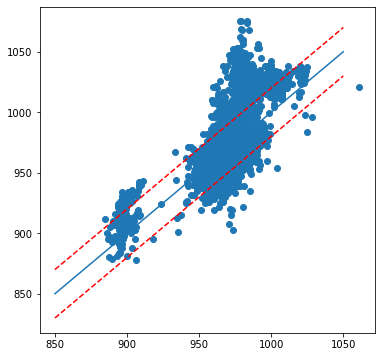

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(model.predict(test_norm), test_target)
_ = plt.plot([850, 1050], [850, 1050])
_ = plt.plot([850, 1050], [830, 1030], 'r--')
_ = plt.plot([850, 1050], [870, 1070], 'r--')
# plt.xlim([920,1000])
# plt.ylim([920,1000])
plt.show()

In [ ]:
model.evaluate(test_norm, test_target)

128/128 [==============================] - 0s 890us/step - loss: 423.8019 - root_mean_squared_error: 20.5865


[423.80194091796875, 20.586450576782227]

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

100 - mape(test_target, model.predict(test_norm))

97.10229868443264

In [ ]:
pred_values = model.predict(test_norm)
pred_success = 0

for i in range(len(test_target)):
    if ((test_target.values[i] - 20) <= pred_values[i][0]) & ((test_target.values[i] + 20) >= pred_values[i][0]):
        pred_success += 1
        
pred_success_rate = pred_success / len(test_target) * 100
print(f'소재 온도 예측 성공률(±20℃): {pred_success_rate}')

소재 온도 예측 성공률(±20℃): 71.11763267302518
